In [5]:
import sys
import os
sys.path.append(os.getcwd().removesuffix('\\data_prepare'))
print(sys.path)
from processing.utils import load_itk
import numpy as np
import matplotlib.pyplot as plt
from processing.tooth_fairy_classes import compress_tooth_fairy_classes
from tqdm import tqdm 

path = 'D:/ToothFairy3'

def extract_masked_values(image, mask, num:int):
    
    return image[mask == num]

all_values = [[],[],[],[],[],[],[]]

img_paths = [os.path.join(path,'imagesTr', p) for p in os.listdir(os.path.join(path,'imagesTr'))]
mask_paths = [os.path.join(path,'labelsTr', p) for p in os.listdir(os.path.join(path,'labelsTr'))]

i = 0

for img_p, mask_p in tqdm(zip(img_paths, mask_paths)):

    img = load_itk(img_p)
    mask = load_itk(mask_p)

    mask = compress_tooth_fairy_classes(mask)

    for j in range(1,8):
        values = extract_masked_values(img, mask, j)
        all_values[j-1].extend(values) 
    
    i+=1

    if (i > 30):
        break

['c:\\Users\\Jan\\miniconda3\\python312.zip', 'c:\\Users\\Jan\\miniconda3\\DLLs', 'c:\\Users\\Jan\\miniconda3\\Lib', 'c:\\Users\\Jan\\miniconda3', '', 'c:\\Users\\Jan\\miniconda3\\Lib\\site-packages', 'c:\\Users\\Jan\\miniconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Jan\\miniconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Jan\\miniconda3\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Jan\\Desktop\\teeth_segmentor', 'c:\\Users\\Jan\\Desktop\\teeth_segmentor']


30it [00:52,  1.75s/it]


[ 56.23597765 349.30145251 126.25162011 ... 830.38599452 769.37312803
 751.36933136]
[-158.81206704 -283.84       -178.81653631 ... -539.90297406 -505.89580257
 -331.85910146]
[-176.81608939 -311.84625698 -465.88067039 ...  518.32018561  507.31786543
  595.33642691]
[ -58.78972067  -19.78100559  105.24692737 ...  893.39928285 1057.43387471
 1068.4361949 ]
[1741.61251397 1654.59307263 1530.56536313 ... 1118.6034188  1549.72621083
 1455.6994302 ]
[1661.59463687  942.43396648 1620.58547486 ... 1485.52415102 1411.5085425
 1501.52752584]
[1350.52513966 1362.52782123 1524.56402235 ... 1314.48808268 1298.48470787
 1139.45117064]


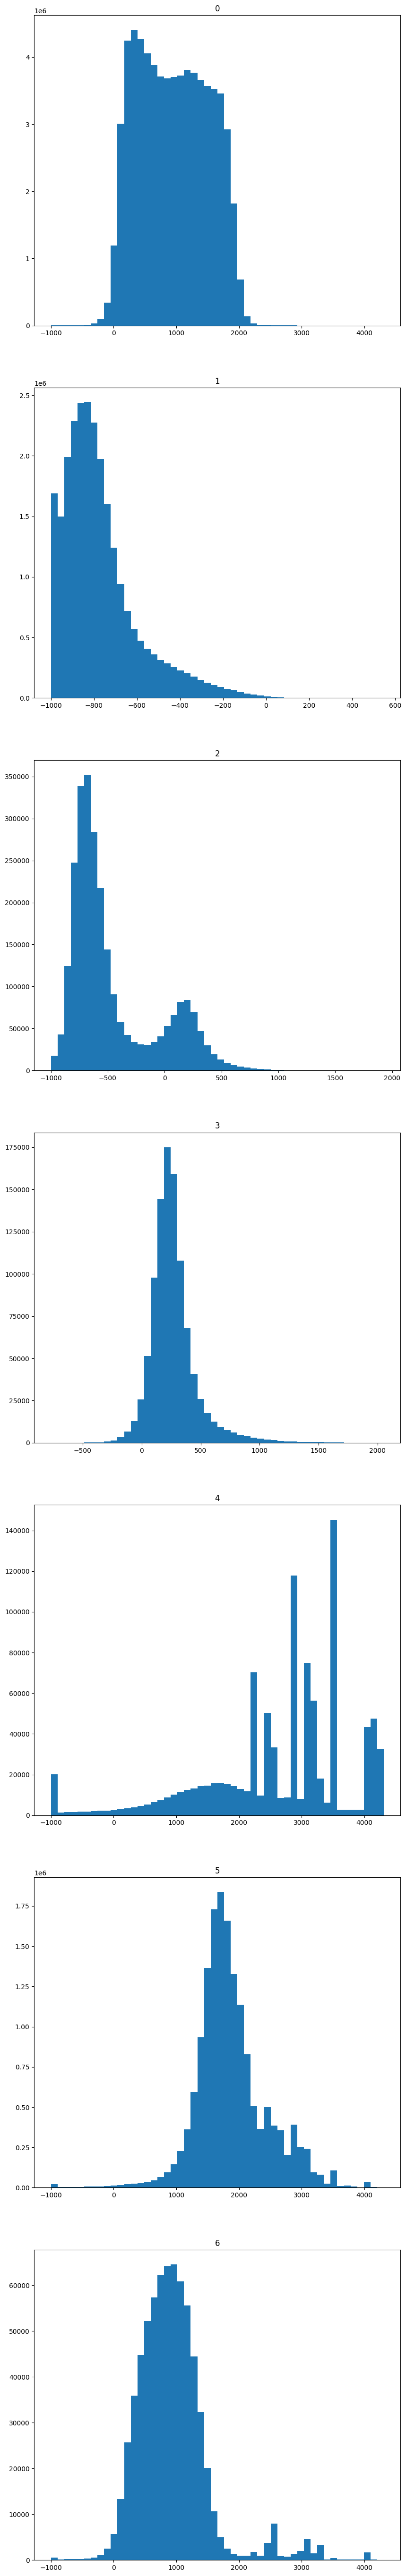

In [6]:
fig, axes = plt.subplots(7, 1, figsize = (10, 70))
for g in range(7):

    temp = np.array(all_values[g])
    print(temp)
    axes[g].hist(temp, bins=50)  
    axes[g].set_title(f'{g}')